In [ ]:
# %pip install pyodbc python-dotenv

In [41]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [42]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [43]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [44]:
connection = pyodbc.connect(connection_string)


In [45]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data_set1 = pd.read_sql(query, connection)

In [46]:
data_set1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [47]:
data_set2 = pd.read_csv('Data\LP2_Telco-churn-second-2000.csv')

data_set2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [48]:
df_test = pd.read_excel('Data\Telco-churn-last-2000.xlsx')

df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


## Analyzing the Data

In [49]:
data_train = pd.concat([data_set1, data_set2],  axis=0  ,ignore_index=True)

data_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [50]:
data_train.shape


(5043, 21)

The first train dataset has data for 5043 customers. It's worth noting that the following columns have null values; multipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, TotalCharges, Churn

In [51]:
data_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Check for missing values


In [53]:
#Check for missing values
data_train.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [54]:
#Fill the missing values in the Multplelines column with values in the Phoneservice column since its evident you can't have multiplelines without phoneservice

#First change the datatype for MultipleLines column to bool
data_train['MultipleLines'] = data_train['MultipleLines'].astype(bool)

#Fill missing values with the values from the phoneservice column

data_train['MultipleLines'] = data_train['MultipleLines'].fillna(data_train['PhoneService'])

In [55]:
#fill the missing values in the columns OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies with 'unknown'

data_train['OnlineSecurity'] = data_train['OnlineSecurity'].fillna('Unknown')
data_train['OnlineBackup'] = data_train['OnlineBackup'].fillna('Unknown')
data_train['DeviceProtection'] = data_train['DeviceProtection'].fillna('Unknown')
data_train['TechSupport'] = data_train['TechSupport'].fillna('Unknown')
data_train['StreamingTV'] = data_train['StreamingTV'].fillna('Unknown')
data_train['StreamingMovies'] = data_train['StreamingMovies'].fillna('Unknown')

In [56]:
# fil missing values in the totalCharges column with the median value

#first change data type to numeric
data_train['TotalCharges'] = pd.to_numeric(data_train['TotalCharges'], errors='coerce')


#find median value

median_value = data_train['TotalCharges'].median()

#fill the missing values
data_train['TotalCharges'] = data_train['TotalCharges'].fillna(median_value)

In [57]:
#Drop the row with the null value in the churn column since it is a target variable
data_train.dropna(subset='Churn', inplace=True)

## Check for Duplication


In [58]:
data_train.duplicated().sum()

0

There are no duplicates in the first train data

In [59]:
# Check for uniques value
data_train.nunique()



customerID          5042
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          2
InternetService        3
OnlineSecurity         6
OnlineBackup           6
DeviceProtection       6
TechSupport            6
StreamingTV            6
StreamingMovies        6
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4862
Churn                  4
dtype: int64

In [60]:
Columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn' ]

final = []

for col in Columns:

    unique_values = data_train[col].unique()

    final.append([col, unique_values])

final_df = pd.DataFrame(final, columns=['Column', 'Unique_Values'])

final_df

,Column,Unique_Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,"[Female, Male]"
2,SeniorCitizen,"[0, 1]"
3,Partner,"[True, False, No, Yes]"
4,Dependents,"[False, True, No, Yes]"
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
6,PhoneService,"[False, True, Yes, No]"
7,MultipleLines,"[False, True]"
8,InternetService,"[DSL, Fiber optic, No]"
9,OnlineSecurity,"[False, True, Unknown, No, Yes, No internet service]"


## Exploratory Data Analysis



In [61]:
data_train.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5042,5042,5042.000000,5042,5042,5042.000000,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042,5042.000000,5042.000000,5042
unique,5042,2,NaN,4,4,NaN,4,2,3,6,6,6,6,6,6,3,4,4,NaN,NaN,4
top,7590-VHVEG,Male,NaN,False,False,NaN,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,NaN,NaN,False
freq,1,2558,NaN,1538,2069,NaN,2730,3336,2247,1478,1320,1296,1475,1190,1198,2744,1775,1699,NaN,NaN,2219
mean,NaN,NaN,0.162436,NaN,NaN,32.568822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.081376,2299.527063,NaN
std,NaN,NaN,0.368886,NaN,NaN,24.525954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.064564,2266.828752,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.799999,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.762500,417.875000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,1401.150024,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050002,3857.012573,NaN


# Observations

The dataset contains virtually an equal number of males and females, however males outnumber females by a margin of 75.

Most customers in the dataset are not senior citizens.

There appears to be more people in relationships than singles.

Most consumers have  dependents.

The average tenure is 32.53, with a median of 29.

The majority of clients are connected with numerous lines.

Most users use fibre optics for their internet connection.

Even though the majority of customers are linked to the internet, online security remains a significant threat.

Most people enjoy to streaming there movies and there favorite tv shows.

Customers also prefer to pay on a monthly basis

Most common method of payment method is through electronic checks

The average monthly charge is 65.09 with the min being 18.4 and max 118

The average total charge is NAN requiring a change of dtype from object to float








## EDA Univariate Analysis

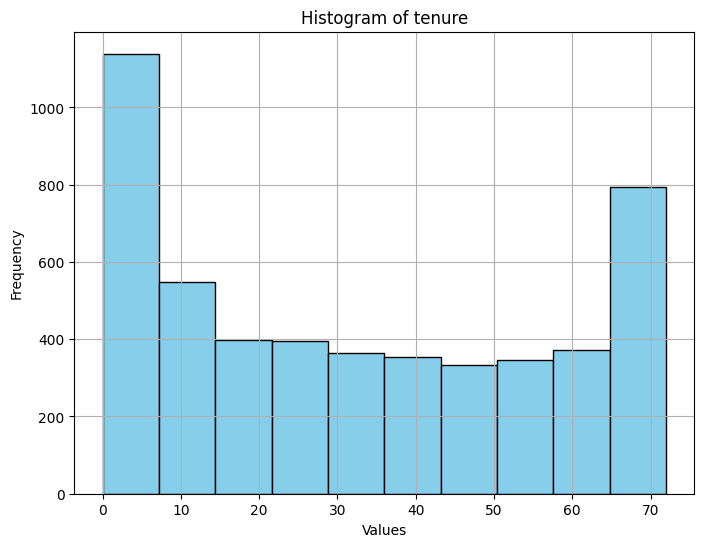

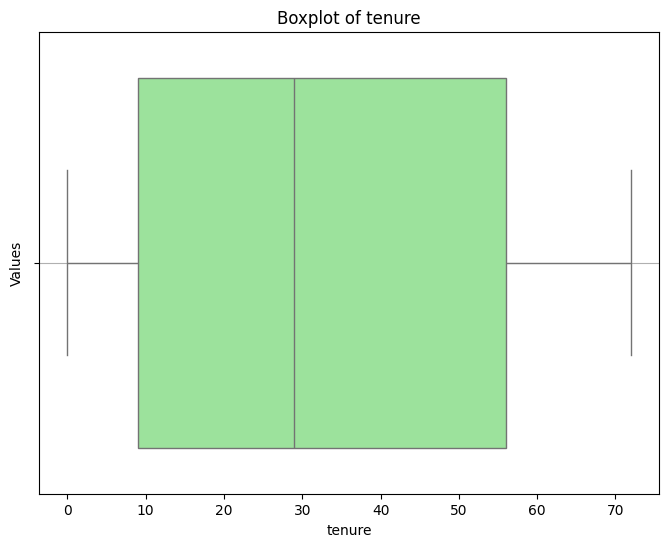

In [62]:
# Create a histogram for tenure
plt.figure(figsize=(8, 6))
plt.hist(data_train['tenure'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of tenure')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_train['tenure'], color='lightgreen', orient='v')
plt.title('Boxplot of tenure')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

# Observations
The histogram shows a bimodal distribution with two distinct peaks each representing two different groups with higher frequencies.

The box-plot shows that minimum tenure is 0 and maximum 72 with a median of 29

there are no outliers

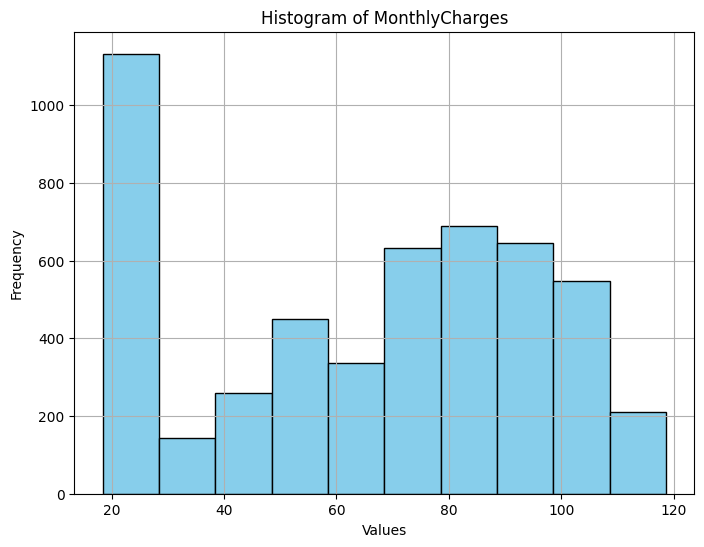

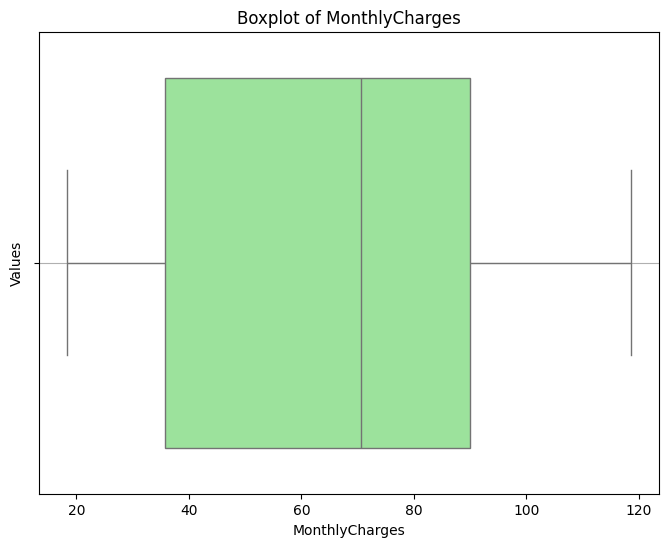

In [63]:
# Create a histogram for MonthlyCharges
plt.figure(figsize=(8, 6))
plt.hist(data_train['MonthlyCharges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_train['MonthlyCharges'], color='lightgreen', orient='v')
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

# Observations

The histogram shows a unimodal distribution with one distinct peak showing a distinct group with a high frequency.

from the boxplot most of the values fall between the median of 70.9 and a minimum of 18.4

there are no outliers

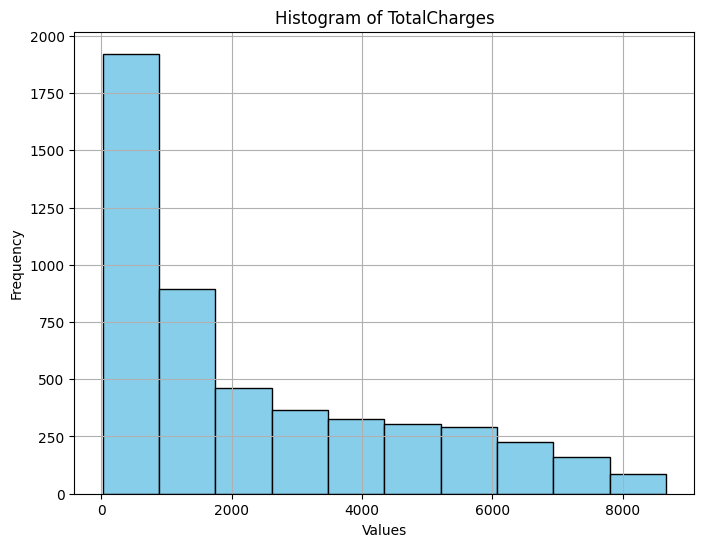

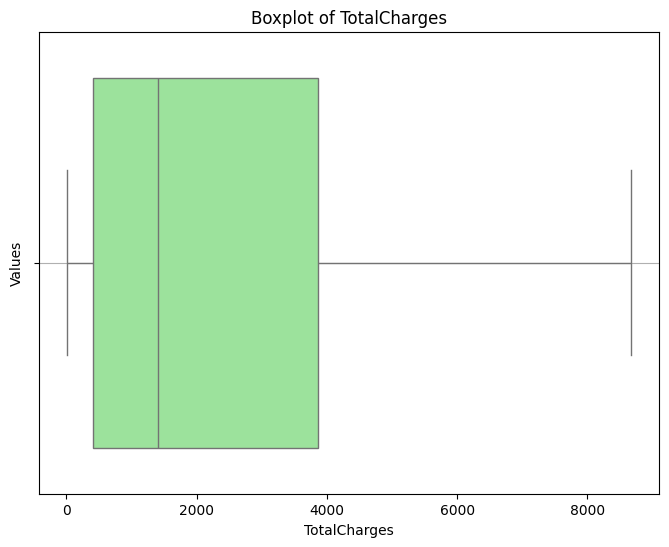

In [64]:
# Create a histogram for TotalCharges
plt.figure(figsize=(8, 6))
plt.hist(data_train['TotalCharges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of TotalCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for TotalCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_train['TotalCharges'], color='lightgreen', orient='v')
plt.title('Boxplot of TotalCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

# Observations
The histogram shows that the data is rightly-skewed indicating that most data values are on the left side.

from the boxplot its clear that there is large range between the median which is 1404 and maximum of 8564

## Analyzing the Categorical Variables

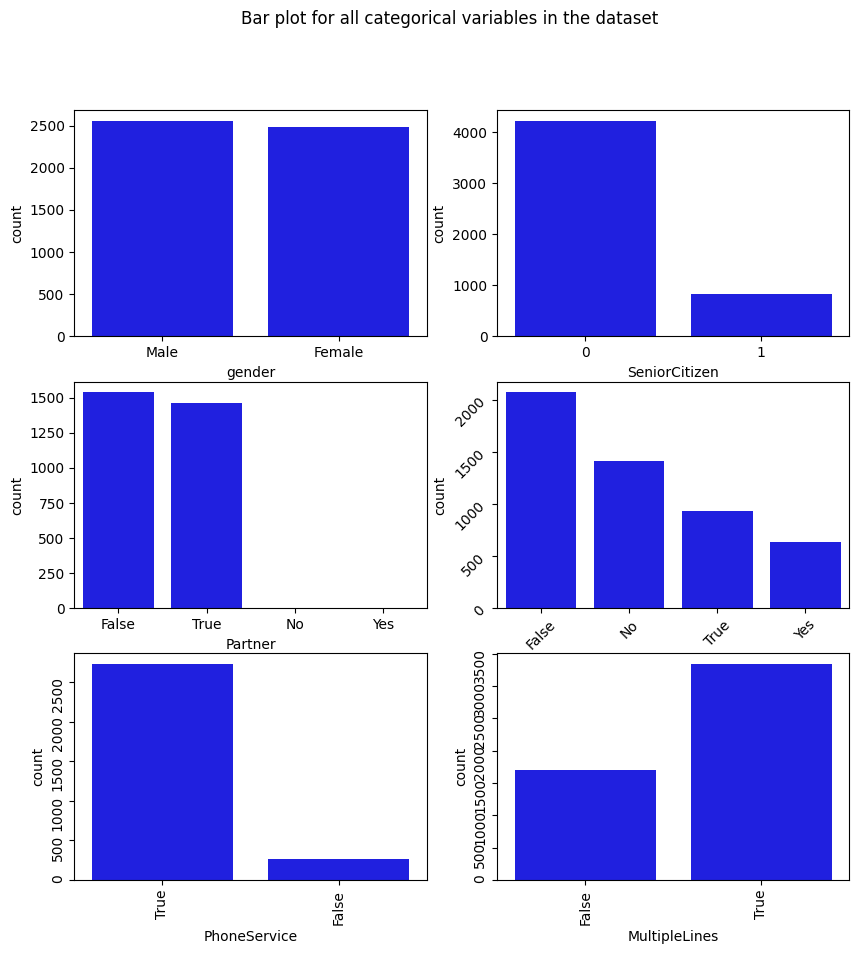

In [65]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'gender', data = data_train, color = 'blue', 
              order = data_train['gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'SeniorCitizen', data = data_train, color = 'blue', 
              order = data_train['SeniorCitizen'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Partner', data = data_set1, color = 'blue', 
              order = data_train['Partner'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Dependents', data = data_train, color = 'blue', 
              order = data_train['Dependents'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'PhoneService', data = data_train, color = 'blue', 
              order = data_train['PhoneService'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'MultipleLines', data = data_train, color = 'blue', 
              order = data_train['MultipleLines'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

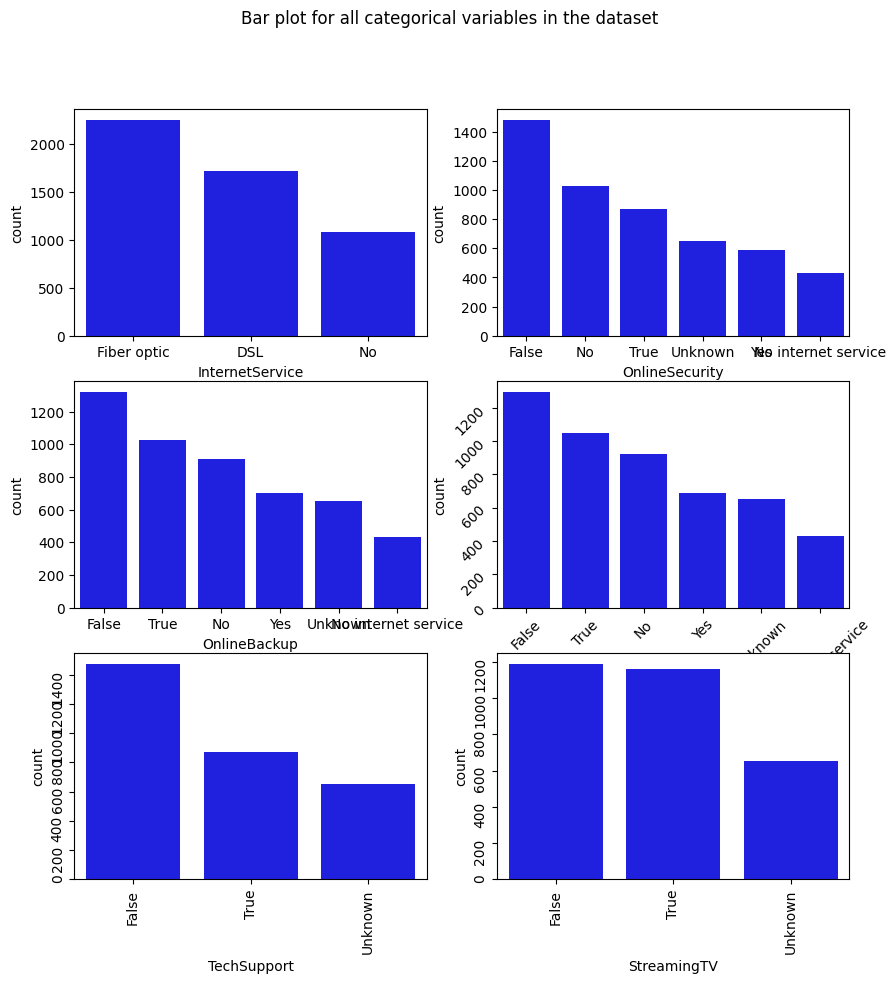

In [66]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'InternetService', data = data_train, color = 'blue', 
              order = data_train['InternetService'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'OnlineSecurity', data = data_train, color = 'blue', 
              order = data_train['OnlineSecurity'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'OnlineBackup', data = data_train, color = 'blue', 
              order = data_train['OnlineBackup'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'DeviceProtection', data = data_train, color = 'blue', 
              order = data_train['DeviceProtection'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'TechSupport', data = data_train, color = 'blue', 
              order = data_train['TechSupport'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'StreamingTV', data = data_train, color = 'blue', 
              order = data_train['StreamingTV'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

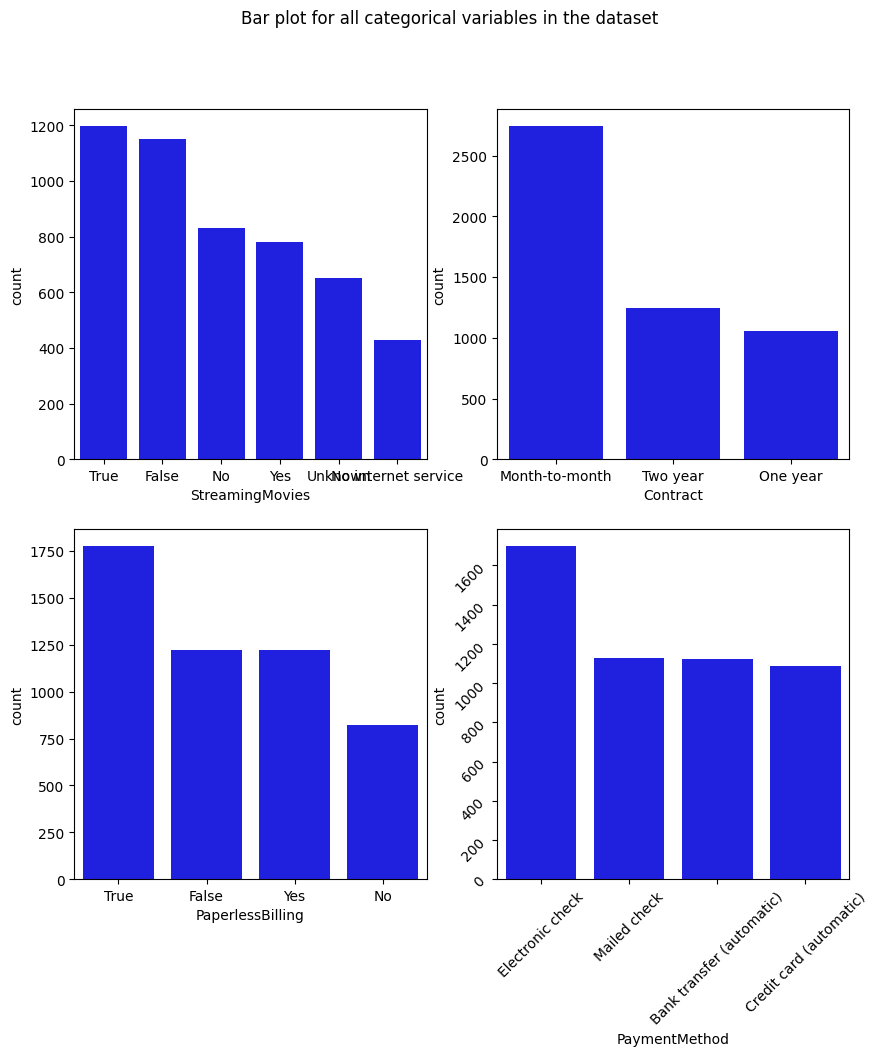

In [67]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'StreamingMovies', data = data_train, color = 'blue', 
              order = data_train['StreamingMovies'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Contract', data = data_train, color = 'blue', 
              order = data_train['Contract'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'PaperlessBilling', data = data_train, color = 'blue', 
              order = data_train['PaperlessBilling'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'PaymentMethod', data = data_train, color = 'blue', 
              order = data_train['PaymentMethod'].value_counts().index);

axes[1][1].tick_params(labelrotation=45);


## Multivariate Analysis

In [69]:
# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data_train.drop(['customerID' ,'gender', 'InternetService', 'Contract', 'PaymentMethod'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 1200x700 with 0 Axes>

# Observation
Each Cell shows the correlation between two variables

There is a strong positive relationship between tenure and total charges

There is also a fairly strong positive correlation between tenure and Multiplines, OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV and StreamingMovies

There is a strong positive relationship between MonthlyCharges and StreamingTV,StreamingMovies and TotalCharges.

## Check for Missing Values


In [89]:
#find th number of missing values
data_set1.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [90]:
#find the percentage of missing values in each column
(data_set1.isnull().sum()/(len(data_set1)))*100

gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [91]:
#Drop the row with the null value in the churn column since it is a target variable
data_set1.dropna(subset='Churn', inplace=True)


In [92]:
#Fill the missing values in the Multplelines column with values in the Phoneservice column since its evident you can't have multiplelines without phoneservice

#First change the datatype for MultipleLines column to bool
data_set1['MultipleLines'] = data_set1['MultipleLines'].astype(bool)

#Fill missing values with the values from the phoneservice column

data_set1['MultipleLines'] = data_set1['MultipleLines'].fillna(data_set1['PhoneService'])

In [93]:
#fill the missing values in the columns OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies with 'unknown'

data_set1['OnlineSecurity'] = data_set1['OnlineSecurity'].fillna('Unknown')
data_set1['OnlineBackup'] = data_set1['OnlineBackup'].fillna('Unknown')
data_set1['DeviceProtection'] = data_set1['DeviceProtection'].fillna('Unknown')
data_set1['TechSupport'] = data_set1['TechSupport'].fillna('Unknown')
data_set1['StreamingTV'] = data_set1['StreamingTV'].fillna('Unknown')
data_set1['StreamingMovies'] = data_set1['StreamingMovies'].fillna('Unknown')

In [94]:
# fil missing values in the totalCharges column with the median value

median_value = data_set1['TotalCharges'].median()
data_set1['TotalCharges'] = data_set1['TotalCharges'].fillna(median_value)

In [ ]:
#drop the customerid column
data_train.drop(['customerID'], axis=1,  inplace=True)
data_train.head(2)